<div style="display: flex; align-items: center; justify-content: space-between; background-color: #1e355f; padding: 30px;">
    <div>
        <h1 style="color: white; text-align: center; font-weight: bold;">Datos No Estructurados: IMAGEN</h1>
        <h2 style="color: white; text-align: center;">Clasificador de Melanoma</h2>
    </div>

</div>

<div style="padding: 5px;">
    <h3 style="color: #1e355f; font-weight: bold;">Realizado por:</h3>
</div>

- Álvaro Ezquerro Pérez
- María Calvo de Mora Román
- Celia Quiles Alemañ


<div style="display: flex; align-items: center; justify-content: space-between; background-color: #1e355f; padding: 10px;">
    <div>
        <h1 style="color: white; text-align: center; font-weight: bold;">Transformer de imagen preentrenado</h1>
    </div>
</div>


<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Descripción y Objetivos:</h2>
</div>

???

<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Introducción:</h2>
</div>

???

<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Código:</h2>
</div>

In [15]:
import os
import sys

import numpy as np
import torch
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Own modules
notebook_path = os.getcwd()
if notebook_path not in sys.path:
    sys.path.append(notebook_path)
project_path = os.path.dirname(os.path.dirname(notebook_path))
if project_path not in sys.path:
    sys.path.append(project_path)

from src.finetuning import fine_tune_vit, plot_training, load_prediction_data

In [5]:
# Load data
TRAIN_DIR = os.path.join(project_path, 'data', 'train')
TEST_DIR = os.path.join(project_path, 'data', 'test')

BATCH_SIZE = 32

# Training parameters
MODEL_CHECKPOINT = "google/vit-base-patch16-224-in21k"
IMG_SIZE = 224
EPOCHS = 10

In [6]:
model, history = fine_tune_vit(MODEL_CHECKPOINT, TRAIN_DIR, TEST_DIR, BATCH_SIZE, IMG_SIZE, EPOCHS, device)

# Save the fine-tuned model
model.save_pretrained(os.path.join(project_path, "models", "visionTransformer"))

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/alvaro/Desktop/MBD/NoEstructurados/practicaImagen/venv/lib/python3.9/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 1/10 - Train Loss: 0.2712, Train Accuracy: 0.8886
Epoch 1/10 - Validation Loss: 0.3003, Validation Accuracy: 0.9200
Epoch 2/10 - Train Loss: 0.2700, Train Accuracy: 0.8896
Epoch 2/10 - Validation Loss: 0.2586, Validation Accuracy: 0.9210
Epoch 3/10 - Train Loss: 0.2266, Train Accuracy: 0.9118
Epoch 3/10 - Validation Loss: 0.2193, Validation Accuracy: 0.9340
Epoch 4/10 - Train Loss: 0.2270, Train Accuracy: 0.9085
Epoch 4/10 - Validation Loss: 0.2062, Validation Accuracy: 0.9410
Epoch 5/10 - Train Loss: 0.1887, Train Accuracy: 0.9243
Epoch 5/10 - Validation Loss: 0.2306, Validation Accuracy: 0.9240
Epoch 6/10 - Train Loss: 0.1784, Train Accuracy: 0.9305
Epoch 6/10 - Validation Loss: 0.1807, Validation Accuracy: 0.9390
Epoch 7/10 - Train Loss: 0.1676, Train Accuracy: 0.9314
Epoch 7/10 - Validation Loss: 0.1663, Validation Accuracy: 0.9470
Epoch 8/10 - Train Loss: 0.1536, Train Accuracy: 0.9401
Epoch 8/10 - Validation Loss: 0.1581, Validation Accuracy: 0.9440
Epoch 9/10 - Train Loss:

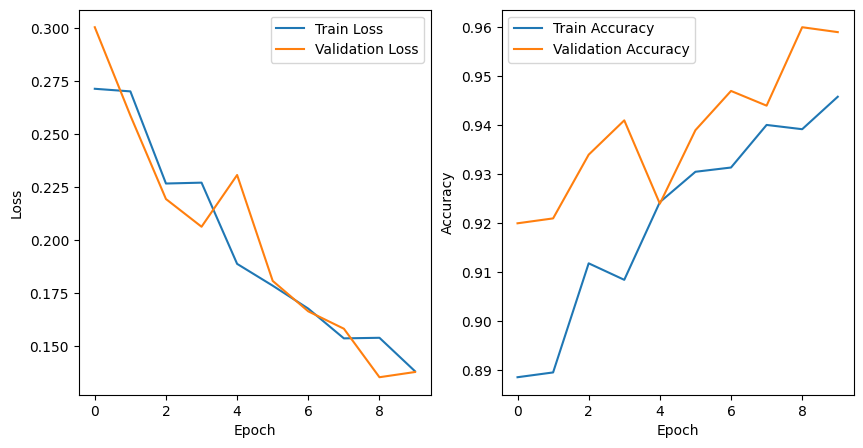

In [7]:
plot_training(history)

<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Predicción:</h2>
</div>

In [28]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.squeeze().numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    fig = plt.figure()
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    return fig

def show_results(data_loader, prediction, output_clases):
    classname = output_clases[prediction]
    image_tensor = next(iter(data_loader))[0]
    imshow(image_tensor, title=f"{classname}")

def predict(model, data_loader, device="cpu"):
        
        predicted_labels = []
        for images, _ in data_loader:
            images = images.to(device)
            outputs = model(images)
            predicted_labels.extend(outputs.logits.argmax(1).tolist())
        return predicted_labels[0]

In [29]:
# Predecir
PREDICTION_DIR = os.path.join(project_path, "data", 'prediction')

data_loader = load_prediction_data(PREDICTION_DIR, img_size=224)

predicted_labels = predict(model, data_loader, device)

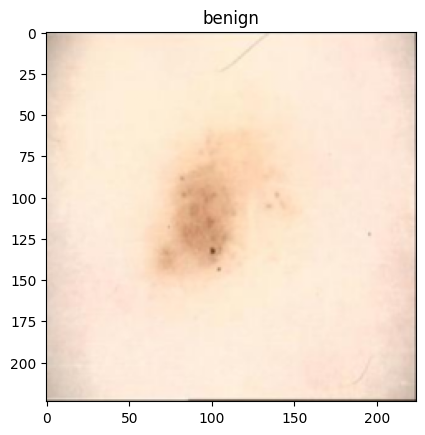

In [31]:
show_results(data_loader, predicted_labels, ["benign", "malignant"])